In [19]:
import pandas as pd
df = pd.read_csv("form.csv")
df = df.iloc[:, 1:]
df.head()


,Name,Roll Number,Branch,Year,Before,During,Study_Method,Environment,CGPA
0,Ani,BTECH/11026/23,PRODUCTION,K23,23.0,8.147727,"Solo(Offline via books and lecture notes), Cla...",Library,7.2
1,Ankit Kumar,BTech/10233/24,CSE,K24,8.0,8.000000,Solo(Online via video lectures),Library,9.2
2,Tathya Varma,btech1080024,AIML,K24,0.0,6.000000,Solo(Online via video lectures),Room(Group Study),7.8
3,Saubhagya Shashank,IED/10009/24,QEDS,K24,3.0,5.000000,"Class lectures and notes only, Solo(Online via...",Room(Solo),8.7
4,Pratyay Banerjee,39,CSE,K22,6.0,12.000000,Solo(Online via video lectures),Room(Solo),9.3


In [20]:
# df['Study strategy followed by you:-'] = df['Study strategy followed by you:-'].replace({'Solo(Offline via books and lecture notes)':0, 'Class lectures and notes only':1, 'Solo(Online via video lectures)':2})
# df.head(15)

In [21]:
df['Study_Method'] = df['Study_Method'].str.split(', ')

df_expanded = df.explode('Study_Method')

df_encoded = pd.get_dummies(df_expanded, columns=['Study_Method'])

df_final = df_encoded.groupby(df_encoded.index).sum()

print("Final shape after encoding:", df_final.shape)

df_final.to_csv("cleaned_study_methods.csv", index=False)

df_final.head()


Final shape after encoding: (45, 11)


,Name,Roll Number,Branch,Year,Before,During,Environment,CGPA,Study_Method_Class lectures and notes only,Study_Method_Solo(Offline via books and lecture notes),Study_Method_Solo(Online via video lectures)
0,AniAniAni,BTECH/11026/23BTECH/11026/23BTECH/11026/23,PRODUCTIONPRODUCTIONPRODUCTION,K23K23K23,69.0,24.443182,LibraryLibraryLibrary,21.6,1,1,1
1,Ankit Kumar,BTech/10233/24,CSE,K24,8.0,8.000000,Library,9.2,0,0,1
2,Tathya Varma,btech1080024,AIML,K24,0.0,6.000000,Room(Group Study),7.8,0,0,1
3,Saubhagya Shashank Saubhagya Shashank,IED/10009/24IED/10009/24,QEDSQEDS,K24K24,6.0,10.000000,Room(Solo)Room(Solo),17.4,1,0,1
4,Pratyay Banerjee,39,CSE,K22,6.0,12.000000,Room(Solo),9.3,0,0,1


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['Before']] = scaler.fit_transform(df[['Before']])

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df_numeric = df.select_dtypes(include=['int64', 'float64'])

df_pca = pca.fit_transform(df_numeric)

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)

df['Cluster'] = kmeans.fit_predict(df_pca)

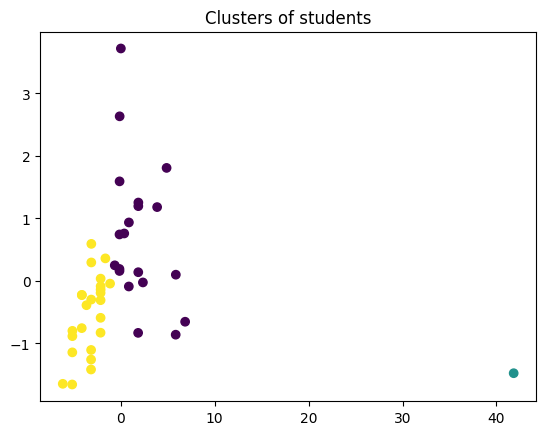

In [25]:
from matplotlib import pyplot as plt

plt.scatter(df_pca[:,0], df_pca[:,1], c=df['Cluster'])
plt.title('Clusters of students')
plt.show()

In [27]:
df['CGPA'] = pd.to_numeric(df['CGPA'], errors='coerce')
df.groupby('Cluster')['CGPA'].mean()



Cluster
0    8.745000
1    7.200000
2    7.764167
Name: CGPA, dtype: float64

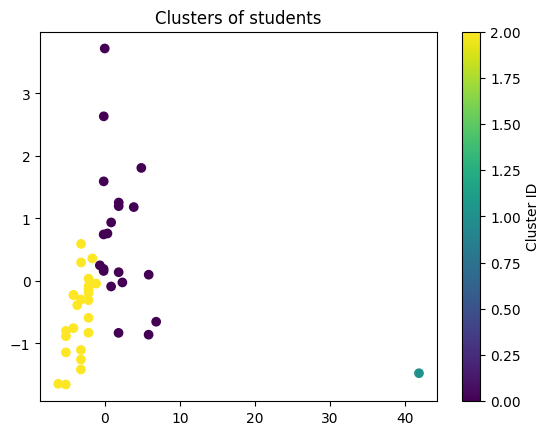

In [29]:
import matplotlib.pyplot as plt

scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Clusters of students')

# Add a color bar (legend for clusters)
plt.colorbar(scatter, label="Cluster ID")

plt.show()


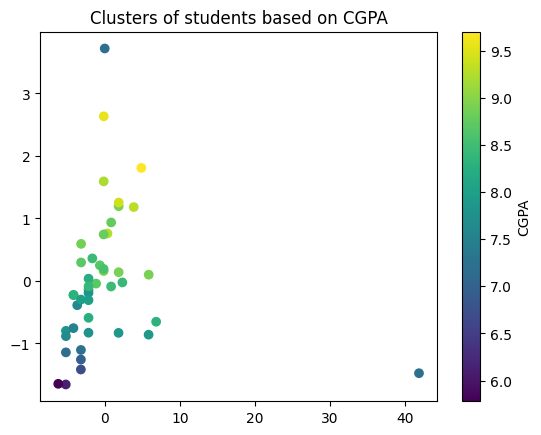

In [31]:

import matplotlib.pyplot as plt

# Scatter plot with CGPA as color
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['CGPA'], cmap='viridis')

plt.title('Clusters of students based on CGPA')

# Add color bar for CGPA
plt.colorbar(scatter, label="CGPA")

plt.show()


In [33]:
df_exploded = df.explode('Study_Method')
df_exploded.groupby('Cluster')['Study_Method'].value_counts()


Cluster  Study_Method                             
0        Solo(Online via video lectures)              14
         Solo(Offline via books and lecture notes)     9
         Class lectures and notes only                 6
1        Solo(Online via video lectures)               1
2        Solo(Online via video lectures)              20
         Class lectures and notes only                11
         Solo(Offline via books and lecture notes)    10
Name: count, dtype: int64

In [ ]:
df_exploded = df.explode('Study_Method') 
df_exploded.groupby('Study_Method')['CGPA'].mean().sort_values(ascending=False)


Study_Method
Class lectures and notes only                8.308235
Solo(Online via video lectures)              8.110571
Solo(Offline via books and lecture notes)    8.089474
Name: CGPA, dtype: float64

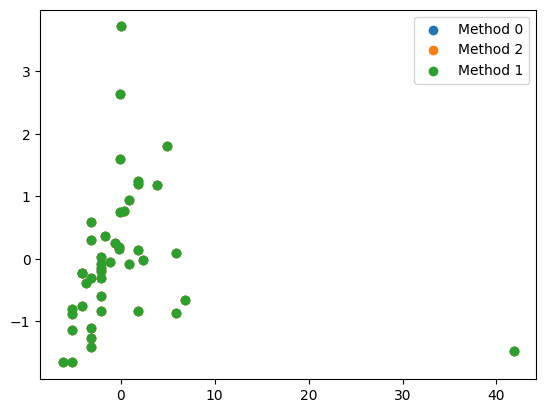

In [ ]:
# for cluster_id in df['Cluster'].unique():
#     subset = df[df['Cluster'] == cluster_id]
#     plt.scatter(df_pca[:, 0], df_pca[:, 1], label=f"Method {cluster_id}")

# plt.legend()
# plt.show()
